# Tension modulated stiff membrane

This notebook is a solver using the functional transform method for a stiff membrane with tension modulation. The membrane is described by the following PDE:

$$
\begin{align}
D \nabla^4 u +\rho h \frac{\partial^2 u}{\partial t^2} - T(u) \nabla^2 u + d_{1} \frac{\partial u}{\partial t} + d_{3} \frac{\partial \nabla^2 u}{\partial t} = f^{(ext)}
\end{align}
$$
Assumming bending stiffness to be small $D/T \ll 1$
Where for a rectangular plate $x \in [0, L_x], y \in [0, L_y]$ of thickness $h$ , $D =  Q h^3 / 12 (1 - \nu ^2)$
$\rho$ is the mass density $(kg/m^3)$, T(u) is the tension, $d_1$ and $d_3$ are the damping coefficients, and $f^{(ext)}$ is the external force.  

The modes for simply supported BC are
$$
K_{n,m}\left(x, y \right) =\sin \left(\frac{n \pi x}{L_x} \right) sin \left(\frac{m \pi y}{L_y} \right)
$$
Where $n, m$ are integers.
$$
\begin{aligned}
& \nabla^2 K_{n, m}(x, y)=-\lambda_{n, m} K_{n, m}(x, y), \\
& \text { with } \quad \lambda_{n, m}=\pi^2\left[\left(\frac{n}{L_x}\right)^2+\left(\frac{m}{L_y}\right)^2\right] .
\end{aligned}
$$






The tension is given by
$$
T(u) = T_0 + T_{NL}(u)
$$

We consider,
$$
T_{N L}(u)=C_{N L} \frac{S(u)-S_0}{S_0} \simeq \frac{1}{2} \frac{C_{N L}}{S_0} \int_{\mathcal{S}}\|\nabla u\|^2 d \mathbf{x}
$$
For the rectangular plate, the Berger approximation is used for the tension
$$
\begin{aligned}
T_{N L}(u) \simeq & \frac{Q h}{2 L_x L_y\left(1-\nu^2\right)} \\
& \cdot \int_0^{L_x} \int_0^{L_y}\left[\left(\frac{\partial u}{\partial x}\right)^2+\left(\frac{\partial u}{\partial y}\right)^2\right] d x d y .
\end{aligned}
$$
And therefore
$$
C_{N L}=\frac{Q h}{\left(1-\nu^2\right)}
$$

$$
\boxed{
\begin{aligned}
\rho h \ddot{\bar{u}}_{n, m}(t) + \left(d_3 \lambda_{n, m}+d_1\right) \dot{\bar{u}}_{n, m}( t) + \left(\lambda_{n, m} \left(\lambda_{n, m}D +T_0\right)\right) \bar{u}_{n, m}(t)-\bar{f}^{(tm)}_{n, m}(u, \bar{u}) = 0
\end{aligned}
}
$$

Where
$$
\begin{aligned}
f^{(tm)}_{n, m}(u, \bar{u}) & = -\lambda_{n, m} T_{N L} (u) \bar{u}_{n, m}(t) \\
& = -\lambda_{n, m} \frac{1}{2}\frac{C_{N L}}{S_0} \left[\sum_{\tilde{n}, \tilde{m}} \frac{\lambda_{\tilde{n}, \tilde{m}}\bar{u}_{\tilde{n}, \tilde{m}}^2 (t)}{\lVert K_{\tilde{n}, \tilde{m}} \rVert_{2}^{2}} \right] \bar{u}_{n, m}(t)
\end{aligned}
$$

For a rectangular plate, the norm of the modes is given by
$$\lVert K_{n, m} \rVert_{2}^{2} = \langle K_{n, m} , K_{n, m} \rangle = \int _0^{L_x}\int _0^{L_y}\sin ^2\left(\frac{n \pi  x}{L_x}\right) \sin ^2\left(\frac{m \pi  y}{L_y}\right)dydx = \frac{L_x L_y}{4} \quad \forall n, m \in \mathbb{Z} $$

Write as a system of first order ODEs:

$$
\begin{aligned}
\dot{\bar{u}}(\mu, t) &= \bar{v}(\mu, t) \\
\dot{\bar{v}}(\mu, t) &= \frac{-\left(d_3 \lambda_\mu+d_1\right)}{\rho h} \bar{v}(\mu, t) - \frac{\beta_\mu}{\rho h} \bar{u}(\mu, t) + \frac{f^{(tm)}_{\mu}(u, \bar{u})}{\rho h}
\end{aligned}
$$
    
Where
$$
\begin{aligned}
\beta_\mu &= \lambda_\mu \left(\lambda_\mu D + T_0\right) = \lambda_\mu^2 D + \lambda_\mu T_0 \\
\bar{b}(\mu, u, \bar{u}) &= \frac{f^{(tm)}_{\mu}(u, \bar{u})}{\rho h}  \\
&= -\frac{1}{\rho h} \lambda_{\mu} \frac{1}{2}\frac{Q h}{\left(1-\nu^2\right)}\frac{1}{L_x L_y} \frac{4}{L_x L_y}\left[\sum_{\eta} \lambda_{\eta}\bar{u}_{\eta}^2 (t) \right] \bar{u}_{\mu}(t) \\
&= -\lambda_{\mu} \frac{Q}{\rho \left(1-\nu^2\right)}\frac{2}{L_x^2 L_y^2}\left[\sum_{\eta} \lambda_{\eta}\bar{u}_{\eta}^2 (t) \right] \bar{u}_{\mu}(t) \\
\end{aligned}
$$


$\bar{u}_{n, m}(t) = \bar{u}_{\mu}(t) $ is a matrix, but to be able to feed it to solve_ivp, we will flatten it to a vector, and index it as $\mu = n \times N_y + m $ where $N_y$ is the number of modes in the y direction. 

This is a system of first-order ODEs. In matrix form, we can write this as:

$$
\boxed{
\begin{aligned}
\mathbf{\dot{\bar{u}}} &= \mathbf{\bar{v}} \\
\mathbf{\dot{\bar{v}}} &= -\mathbf{M_v} \mathbf{\bar{v}} - \mathbf{M_u} \mathbf{\bar{u}} + \mathbf{\bar{b}}
\end{aligned}
}
$$

The Matrices $\mathbf{M_v}$, $\mathbf{M_y}$ are diagonal matrices whose order is equal to the number of modes $M$.

$$
\begin{aligned}
\mathbf{\Lambda} &= \text{diag}\left(\lambda_\mu\right) \\
\mathbf{M_v} &= \text{diag}\left(\frac{d_3 \lambda_\mu + d_1}{\rho h}\right) \\
\mathbf{M_y} &= \text{diag}\left(\frac{\beta_\mu}{\rho h}\right) \\
\mathbf{\bar{b}}(\mathbf{u}, \mathbf{\bar{u}}) &= - \frac{Q}{\rho \left(1-\nu^2\right)}\frac{2}{L_x^2 L_y^2}\mathbf{\Lambda} \left[ \mathbf{\bar{u}}^{T} \mathbf{\Lambda} \mathbf{\bar{u}} \right] \mathbf{\bar{u}}  \\
\mathbf{\bar{b}}(\mathbf{u}, \mathbf{\bar{u}}) &= - \mathbf{C_b}\mathbf{\Lambda} \left[ \mathbf{\bar{u}}^{T} \mathbf{\Lambda} \mathbf{\bar{u}} \right] \mathbf{\bar{u}}  \\
\end{aligned}
$$

In [ ]:
# | default_exp solver.wave2d_tenmod

In [ ]:
# | export

import numpy as np
from scipy.integrate import solve_ivp, simpson

In [ ]:
# | eval: false

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
# | export

class Wave2dSolverTensionModulated:
    """
    Tension modulated wave equation solver for a rectangular stiff membrane.
    The parameters were taken from (Fletcher, 1991, p.86) and adapted to a rectangular case.
    """

    def __init__(
        self,
        sampling_rate: int = 16000,  # 1/s     Temporal sampling frequency
        final_time: float = 0.5,  # s       Duration of the simulation
        n_gridpoints_x: int = 41,  # pts/m   Spatial sampling grid
        length_x: float = 0.4,  # m       Length of x dimension
        aspect_ratio: float = 0.8,  #        Aspect ratio of the membrane, Ly/Lx
        rho: float = 1380,  # kg/m**3 Density
        h: float = 1.9e-4,  # m       Thickness
        E: int = 3.5e9,  # Pa      Young's modulus
        nu: float = 0.3,  #         Poisson's ratio
        d1: float = 8e-5,  # kg/(ms) Frequency independent loss
        d3: float = 1.4e-5,  # kg m/s  Frequency dependent loss
        Ts0: float = 2620,  # N/m       Tension per unit length
        n_max_modes: int = 36,  #         Number of modal coordinates
        use_nonlinear: bool = True,  #         Use nonlinear wave equation
    ):
        # TODO: use a ratio for the side lengths, and use the same ratio for gridpoints
        # Attributes intrinsic to the Wave Equation PDE
        self.pde_num_variables = 1
        self.pde_num_spatial_dimensions = 2
        self.pde_order_time_derivatives = 2

        # Attributes of the simulation
        self.sampling_rate = sampling_rate
        self.final_time = final_time
        self.n_gridpoints_x = n_gridpoints_x
        self.length_x = length_x
        self.aspect_ratio = aspect_ratio
        self.use_nonlinear = use_nonlinear

        # Attributes of the membrane
        self.rho = rho
        self.h = h
        self.E = E
        self.nu = nu
        self.d1 = d1
        self.d3 = d3
        self.Ts0 = Ts0

        # Use the same number of modes in x and y, this might not be a good idea for aspect ratios far from 1
        self.n_max_modes_x = int(np.floor(np.sqrt(n_max_modes)))
        self.n_max_modes_y = int(np.floor(np.sqrt(n_max_modes)))
        self.n_max_modes = self.n_max_modes_x * self.n_max_modes_y
        # if n_max_modes > n_gridpoints - 2:
        #     self.n_max_modes = n_gridpoints - 2
        #     print(f"n_max_modes too high, setting to {self.n_max_modes}")
        # else:
        #     self.n_max_modes = n_max_modes

        x = np.linspace(0, self.length_x, self.n_gridpoints_x)
        self.dx = x[1] - x[0]  # m     spatial sampling interval

        # calculate the gridpoints and length in y using the aspect ratio
        # We want dy to be as close as possible to dx
        self.length_y = self.length_x * self.aspect_ratio
        self.n_gridpoints_y = (
            int(np.floor((self.n_gridpoints_x - 1) * self.aspect_ratio)) + 1
        )

        y = np.linspace(0, self.length_y, self.n_gridpoints_y)
        self.x = x
        self.y = y

        self.grid_x, self.grid_y = np.meshgrid(x, y, indexing="ij")
        #  spatial grid
        # self.grid_x = np.m

        self.dy = y[1] - y[0]  # m     spatial sampling interval

        #  temporal grid use arange to make sure that the timestep corresponds exactly to the sampling frequency
        self.dt = 1 / self.sampling_rate  # s     temporal sampling interval
        self.timesteps = np.arange(0, self.final_time, self.dt)

        self.mu_x = np.arange(1, self.n_max_modes_x + 1)
        self.mu_y = np.arange(1, self.n_max_modes_y + 1)
        self.wavenumbers_x = self.mu_x * np.pi / self.length_x
        self.wavenumbers_y = self.mu_y * np.pi / self.length_y

        self.grid_wavenumber_x, self.grid_wavenumber_y = np.meshgrid(
            self.wavenumbers_x, self.wavenumbers_y
        )
        self.modes = np.zeros(
            (
                self.n_max_modes_x,
                self.n_max_modes_y,
                self.n_gridpoints_x,
                self.n_gridpoints_y,
            )
        )
        self.lambdas = np.zeros((self.n_max_modes_x * self.n_max_modes_y))

        for i, wx in enumerate(self.wavenumbers_x):
            for j, wy in enumerate(self.wavenumbers_y):
                self.modes[i, j, :, :] = np.sin(wx * self.grid_x) * np.sin(
                    wy * self.grid_y
                )
                self.lambdas[i * self.n_max_modes_y + j] = wx**2 + wy**2

        self.D = self.E * (self.h) ** 3 / (12 * (1 - self.nu**2))
        CNL = self.E * self.h / (1 - self.nu**2)

        beta_mu = self.D * self.lambdas**2 + self.Ts0 * self.lambdas

        # calculate the matrices
        self.Lambdadiag = np.diag(self.lambdas)
        # self.H_1 = np.diag(self.lambdas) / (self.rho * self.h)

        self.M_v = np.diag(self.d1 + self.d3 * self.lambdas) / (self.rho * self.h)

        self.M_u = np.diag(beta_mu) / (self.rho * self.h)

        # coeffficient for the nonlinear term
        self.Cb = (
            2
            * self.E
            / (self.rho * self.length_x**2 * self.length_y**2 * (1 - self.nu**2))
        )

    def print_matrices(self):
        print(f"Lambdadiag shape: {self.Lambdadiag.shape}")
        # print(f"H_1 shape: {self.H_1.shape}")
        print(f"M_v shape: {self.M_v.shape}")
        print(f"M_u shape: {self.M_u.shape}")
        return

    def print_solver_info(self):
        # Print some information
        print(f"dx: {self.dx} in meters")
        print(f"dy: {self.dy} in meters")
        print(f"dt: {self.dt} in seconds")
        print(
            f"number of points in the x direction (n_gridpoints_x): {self.n_gridpoints_x}"
        )
        print(
            f"number of points in the y direction (n_gridpoints_y): {self.n_gridpoints_y}"
        )
        print(f"time in samples (nt): {self.timesteps.shape}")
        print(f"number of modes in x direction (n_max_modes_x): {self.n_max_modes_x}")
        print(f"number of modes in y direction (n_max_modes_y): {self.n_max_modes_y}")
        print(
            f"number of modes (n_max_modes): {self.n_max_modes_x * self.n_max_modes_y}"
        )
        print(f"length in x direction (length_x): {self.length_x} in meters")
        print(f"length in y direction (length_y): {self.length_y} in meters")
        # Print the shapes of the grids and the wavenumbers
        print(f"grid_x shape: {self.grid_x.shape}")
        print(f"grid_y shape: {self.grid_y.shape}")
        print(f"wavenumbers_x shape: {self.wavenumbers_x.shape}")
        print(f"wavenumbers_y shape: {self.wavenumbers_y.shape}")
        print(f"modes shape: {self.modes.shape}")
        print(f"lambdas shape: {self.lambdas.shape}")
        return

    def to_modal(
        self, u, v, integrator: str = "simpson"  # displacement  # velocity
    ) -> tuple[np.ndarray, np.ndarray]:
        """Project the displacement and velocity to modal coordinates.
        Also flatten the arrays to be 1D.
        For now we can only consider initial conditions of zero velocity."""
        bar_u = np.zeros(self.n_max_modes)
        # bar_z2 = np.zeros(self.n_max_modes)
        bar_v = np.zeros(self.n_max_modes)

        if integrator == "simpson":
            for i in range(self.n_max_modes_x):
                for j in range(self.n_max_modes_y):
                    uu = u * self.modes[i, j, :, :]
                    bar_u[i * self.n_max_modes_y + j] = simpson(
                        [simpson(uu_y, x=self.y) for uu_y in uu], x=self.x
                    )
                    vv = v * self.modes[i, j, :, :]
                    bar_v[i * self.n_max_modes_y + j] = simpson(
                        [simpson(vv_y, x=self.y) for vv_y in vv], x=self.x
                    )
        elif integrator == "trapz":
            # This is unverified, use simpson for now
            raise NotImplementedError
            # for i in range(self.n_max_modes_x):
            #     for j in range(self.n_max_modes_y):
            #         bar_u[i * self.n_max_modes_y + j] = self.dx*self.dy*np.sum(self.modes[i, j, :, :] * u)
            #         # bar_z_dot[i * self.n_max_modes_y + j] = np.sum(
            #     self.modes[i, j, :, :] * z_dot
            # )
        else:
            raise ValueError(f"Integrator {integrator} not recognised")

        return bar_u, bar_v

    def to_displacement(
        self,
        bar_u,  # modal displacement
        bar_v,  # modal velocity
    ) -> tuple[np.ndarray, np.ndarray]:
        """Sum the modal displacements and velocities to get the displacement and velocity"""

        u = np.zeros((self.n_gridpoints_x, self.n_gridpoints_y))
        v = np.zeros((self.n_gridpoints_x, self.n_gridpoints_y))
        norm_factor = 4 / (self.length_x * self.length_y)
        for i in range(self.n_max_modes_x):
            for j in range(self.n_max_modes_y):
                u += bar_u[i * self.n_max_modes_y + j] * self.modes[i, j, :, :]
                v += bar_v[i * self.n_max_modes_y + j] * self.modes[i, j, :, :]
        u *= norm_factor
        v *= norm_factor
        return u, v

    def enforce_boundary_conditions(self, u, v):
        """Enforce dirichlet boundary conditions.
        ATTN: remember v is respect to time, not x,y
        """
        u[0, :] = 0
        u[-1, :] = 0
        u[:, 0] = 0
        u[:, -1] = 0
        v[0, :] = 0
        v[-1, :] = 0
        v[:, 0] = 0
        v[:, -1] = 0
        return u, v

    def nonlinear_membrane(
        self,
        t,  # time
        state,  # state vector
    ) -> np.ndarray:  # state at timestep t and position x (u(x, t))
        # unpack the state vector
        bar_u = state[: self.n_max_modes]  # displacement in modal coordinates
        bar_v = state[self.n_max_modes :]  # velocity in modal coordinates

        # add axis for calculation
        bar_u = bar_u[..., None]

        # calculate the $\bar{b}$ vector
        # ATTN: this b doesn't include the minus sign
        if self.use_nonlinear:
            deformation = bar_u.T @ self.Lambdadiag @ bar_u
            b = self.Cb * deformation * self.Lambdadiag @ bar_u

        # update the state vector
        bar_udot = bar_v
        bar_vdot = -self.M_v @ bar_v - self.M_u @ bar_u.squeeze()
        if self.use_nonlinear:
            bar_vdot -= b.squeeze()

        # return the state derivatives
        return np.concatenate([bar_udot, bar_vdot])

    def solve(
        self,
        u0: np.ndarray = None,  # initial displacement (default: None)
        v0: np.ndarray = None,  # initial velocity (default: None)
    ) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
        """Solve the wave equation with the given initial conditions."""

        # set the initial conditions if not given
        u0 = u0 if u0 is not None else np.zeros_like(self.grid_x)
        v0 = v0 if v0 is not None else np.zeros_like(self.grid_x)

        # Enforce the simply suppported boundary conditions a tht e edges of the membrane
        u0, v0 = self.enforce_boundary_conditions(u0, v0)
        # transform the initial conditions to modal coordinates
        bar_u0, bar_v0 = self.to_modal(u0, v0)
        # solve the wave equation in modal coordinates
        sol = solve_ivp(
            fun=self.nonlinear_membrane,
            t_span=[0, self.final_time],
            y0=np.concatenate([bar_u0, bar_v0], axis=0),
            t_eval=self.timesteps,
            method="DOP853",
            rtol=1e-12,
            atol=1e-14,
        )

        # unpack the solution
        bar_u = sol.y[: self.n_max_modes]
        bar_v = sol.y[self.n_max_modes :]

        # store the modal solution
        self.bar_u = bar_u
        self.bar_v = bar_v

        # Print the shapes of the solutions
        print(f"bar_u shape: {bar_u.shape}")
        print(f"bar_v shape: {bar_v.shape}")
        # transform back to the physical domain
        # This loop is probably extremely slow but is only done once
        u = np.zeros(
            (
                len(sol.t),
                self.n_gridpoints_x,
                self.n_gridpoints_y,
            )
        )
        v = np.zeros(
            (
                len(sol.t),
                self.n_gridpoints_x,
                self.n_gridpoints_y,
            )
        )
        for i in range(len(sol.t)):
            u[i, :, :], v[i, :, :] = self.to_displacement(bar_u[:, i], bar_v[:, i])

        return (
            sol.t,
            u,
            v,
        )

dx: 0.0025 in meters
dy: 0.0025000000000000005 in meters
dt: 6.25e-05 in seconds
number of points in the x direction (n_gridpoints_x): 161
number of points in the y direction (n_gridpoints_y): 129
time in samples (nt): (80,)
number of modes in x direction (n_max_modes_x): 25
number of modes in y direction (n_max_modes_y): 25
number of modes (n_max_modes): 625
length in x direction (length_x): 0.4 in meters
length in y direction (length_y): 0.32000000000000006 in meters
grid_x shape: (161, 129)
grid_y shape: (161, 129)
wavenumbers_x shape: (25,)
wavenumbers_y shape: (25,)
modes shape: (25, 25, 161, 129)
lambdas shape: (625,)
Aspect ratio: 0.9999999999999998
Solver aspect ratio: 0.8
Mode max value: 1.0
Mode max value: 1.0
Mode max value: 1.0
Mode max value: 1.0
Mode max value: 0.9998072404820648
Mode max value: 1.0


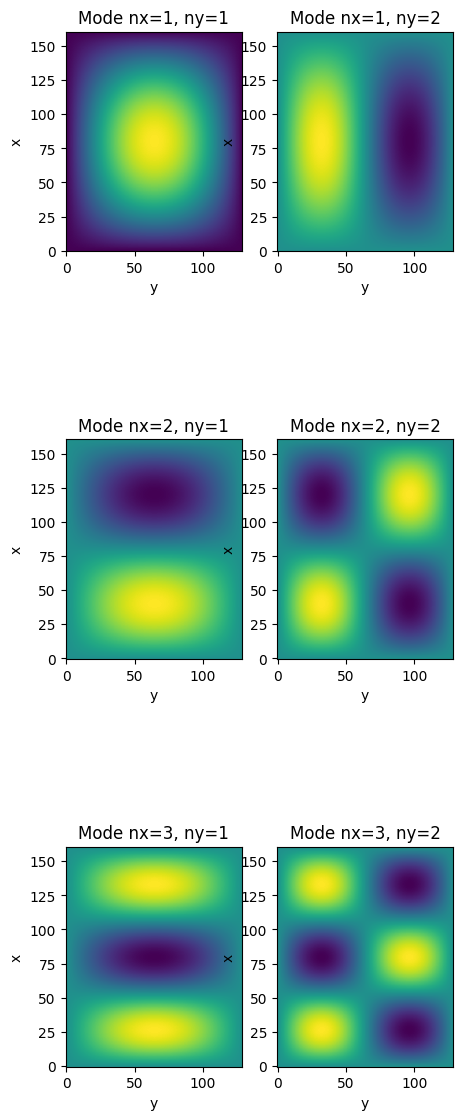

In [ ]:
# | eval: false

# Initialize the solver
solver = Wave2dSolverTensionModulated(sampling_rate=16000, final_time=0.005, n_max_modes=625,n_gridpoints_x=161, use_nonlinear=True)
# Plot some of the modes
nx = 3
ny = 2
fig, ax = plt.subplots(nx, ny, figsize=(5, 15))
aspect_ratio_dxdy = solver.dx/solver.dy
# Print this aspect ratio and the one used in the solver
solver.print_solver_info()
print(f"Aspect ratio: {aspect_ratio_dxdy}")
print(f"Solver aspect ratio: {solver.aspect_ratio}")
for i in range(nx):
    for j in range(ny):
        print(f"Mode max value: {np.max(solver.modes[i, j, :, :])}")
        ax[i, j].imshow(solver.modes[i, j, :, :], aspect = aspect_ratio_dxdy, origin='lower')
        ax[i, j].set_title(f"Mode nx={i+1}, ny={j+1}")
        ax[i, j].set_xlabel("y")
        ax[i, j].set_ylabel("x")
        # ax[i, j].tight_layout()

In [ ]:
# | eval: false

# Create a simple initial condition, one the modes + additive noise
mode_n = 3
mode_m = 3
indn = mode_n - 1
indm = mode_m - 1

u0 = 0.0*solver.modes[indn, indm, :, :] + 0.001 * np.random.randn(solver.n_gridpoints_x, solver.n_gridpoints_y)
v0 = np.zeros_like(u0)


In [ ]:
# | eval: false

# This was code for checking the projection to modal coordinates depending on the integration method

u0 = solver.modes[indn, indm, :, :]
v0 = np.zeros_like(u0)

# Project the initial condition to modal coordinates
bar_u_simpson, bar_v_simpson = solver.to_modal(u0,v0)
# Print the modal coordinates
print("Difference")
# Print the difference between the two methods
# print(bar_z - bar_z2)

# f = lambda y, x: np.sin(solver.wavenumbers_x[indn] * x) * np.sin(solver.wavenumbers_y[indm] * y)*np.sin(solver.wavenumbers_x[indn] * x) * np.sin(solver.wavenumbers_y[indm] * y)
# for i, x in enumerate(solver.x):
#     for j, y in enumerate(solver.y):
#         f_val = f(y, x)
#         difference = f_val-solver.modes[indn, indm, i, j]
#         if difference > 1e-15:
#             print(f"Error at ({x}, {y})")
#             print(f"Exact: {f_val}")
#             print(f"Approx: {solver.modes[indn, indm, i, j]}")
#             print(f"Difference: {difference}")
# print(solver.length_x)
# print(solver.length_y)
# print(solver.wavenumbers_x[indn])
# print(solver.wavenumbers_y[indm])
# exact_int = dblquad(f, 0, 1.0, 0, 0.5)
# print((exact_int))

Difference


In [ ]:
# | eval: false

def gaussian_pulse(x_grid, y_grid, x0, y0, sigma):
    return np.exp(-((x_grid-x0)**2 + (y_grid-y0)**2)/(2*sigma**2))

def noise(grid):
    return np.random.randn(grid.shape)
    

In [ ]:
# | eval: false

# Solve the wave equation
# u0 = np.zeros((solver.n_gridpoints_x, solver.n_gridpoints_y))
u0 = (solver.modes[0, 0, :, :]**2)
# Create a gaussian impulse
u0 = np.zeros((solver.n_gridpoints_x, solver.n_gridpoints_y))
u0 = np.random.randn(solver.n_gridpoints_x, solver.n_gridpoints_y)
ctr = (0.37*solver.length_x, 0.63*solver.length_y)
std = 0.005
for i in range(solver.n_gridpoints_x):
    for j in range(solver.n_gridpoints_y):
        u0[i, j] = np.exp(-((solver.grid_x[i, j] - ctr[0])**2 + (solver.grid_y[i, j] - ctr[1])**2)/(2*std**2))

u0_alt = gaussian_pulse(solver.grid_x, solver.grid_y, ctr[0], ctr[1], std)
# Compare the two initial conditions
print(np.allclose(u0, u0_alt))
v0 = np.zeros_like(u0)
u0 = 0.005*u0
# Add a delta impuse to the initial velocity, close to the center
# v0[solver.n_gridpoints_x//2, solver.n_gridpoints_y//2] = 20

t, u, v = solver.solve(u0=u0, v0=v0)
print(f"u shape: {u.shape}")
print(f"v shape: {v.shape}")

True
bar_u shape: (625, 80)
bar_v shape: (625, 80)
u shape: (80, 161, 129)
v shape: (80, 161, 129)


True
False
True
False


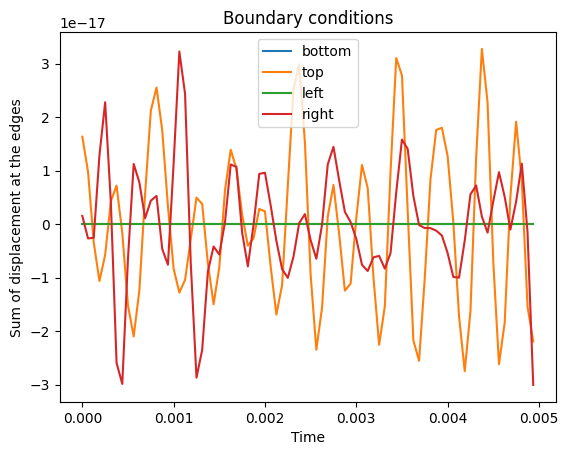

In [ ]:
# | eval: false

# Check that the boundary conditions are maintained
print(np.all(u[:, 0, :] == 0))
print(np.all(u[:, -1, :] == 0))
print(np.all(u[:, :, 0] == 0))
print(np.all(u[:, :, -1] == 0))

# Plot the sum error of the solution at the edges for all timesteps
plt.figure()
plt.plot(t, np.sum(u[:, 0, :], axis=1), label="bottom")
plt.plot(t, np.sum(u[:, -1, :], axis=1), label="top")
plt.plot(t, np.sum(u[:, :, 0], axis=1), label="left")
plt.plot(t, np.sum(u[:, :, -1], axis=1), label="right")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Sum of displacement at the edges")
plt.title("Boundary conditions")
plt.show()

In [ ]:
# | eval: false

# Plot the solution as an animation usign matplotlib

# N_plots=100
fig,ax = plt.subplots(1,2)
def animate(i):
    ax[0].clear()
    ax[1].clear()
    ax[0].imshow(u[i,:,:], aspect = aspect_ratio_dxdy, origin='lower')
    ax[1].imshow(v[i,:,:], aspect = aspect_ratio_dxdy, origin='lower')
    ax[0].set_title(f"Displacement")
    ax[0].set_xlabel("y")
    ax[0].set_ylabel("x")
    ax[1].set_title(f"Velocity")
    ax[1].set_xlabel("y")
    ax[1].set_ylabel("x")
ani = FuncAnimation(fig, animate, frames=20,
                    interval=500, repeat=False)
plt.close()
from IPython.display import HTML
HTML(ani.to_jshtml())

